# Read the processed titanic dataframe.

Store it in a dataframe called `titanic_train` and `titanic_test`.

In [1]:
import pandas as pd
# your code here
titanic_train=pd.read_csv("titanic_train.csv")
titanic_test=pd.read_csv("titanic_test.csv")

In [2]:
titanic_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,3,19.0,0,0,7.775,1,0,1,0
1,2,40.0,0,0,15.750,0,0,1,1
2,2,33.0,0,0,12.275,1,0,1,0
3,2,7.0,0,2,26.250,0,0,1,1
4,3,25.0,0,0,7.225,1,0,0,0


# Train and Test

You have separated the original dataset into train and test. In fact, what you were effectively doing was hiding some part of your data to analyse your scores afterwards.

# First Step: start simple

You will select two variables to create the predictive variables for your problem - store the features representing the `Sex` and `Age` in dataframes called `X_train` and `X_test`. (maybe the `sex` variable is written as `Sex_male` for example, if you dummyfied it)

Also store the variable `Survived` into pandas series called `y_train` and `y_test`. This is your target variable. 

In [3]:
# your code here
X_train=titanic_train[["Sex_male","Age"]]
X_test=titanic_test[["Sex_male","Age"]]
y_train=titanic_train["Survived"]
y_test=titanic_test["Survived"]

# Logistic regression for classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Use the LogisticRegression classifier to train your model on your train set.

In [4]:
# your code here
from sklearn.linear_model import LogisticRegression

In [5]:
lrmodel= LogisticRegression()
lrmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Use your logistic regression model to generate a prediction for your test dataset. 

Create a variable called `y_pred` to put the results of the model. Try to understand what exactly the `.predict()` method is doing. 

In [6]:
# your code here
y_pred= lrmodel.predict(X_test)
list(zip(y_pred,y_test))

[(0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 

## Evaluating the results

Use your model's method called `score` to evaluate the results on your test set. 

In [7]:
# your code here
lrmodel.score(X_test,y_test)

0.7303370786516854

## To think:

- What does the `.score()` method calculates?
- Is this metric appropriate for this use case? Why?

In [8]:
# your answer here
# the score calculates the accuracy of a model, it is not appropriate since our dataset is unbalanced

## Confusion matrix

Print the confusion matrix for the results obtained.

_hint: You can use the `pd.crosstab()` or the_ `sklearn.metrics.confusion_matrix` _method_ 

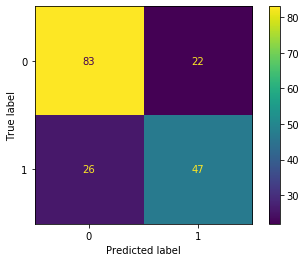

In [9]:
# your code here
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lrmodel,X_test,y_test)

## Precision-recall scores

## Calculate the precision and recall scores for the test set. 

_hint: Use the methods from sklearn.metrics_ 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [10]:
# your code here
from sklearn.metrics import recall_score,precision_score

In [11]:
r=recall_score(lrmodel.predict(X_test),y_test)
p=precision_score(lrmodel.predict(X_test),y_test)
print(f"The precision score is {p} and the recall score is {r}")

The precision score is 0.6438356164383562 and the recall score is 0.6811594202898551


### Questions:

- What do these precision and recall scores mean? Explain precision and recall with your own words.
- Are these the precision and recall scores for which threshold? Explain what a threshold mean with your own words.

In [12]:
# your code here
# Precision shows how many times the model is right considering the 0 label and the recall show the same thing regarding the 1 label. 
#The default threshold is 0.5, it means that if the model has a probability > 0.5 the result will be 1. 

## Compare a measure of accuracy, recall and precision for both train and test sets. 

You've calculated the metrics for the test dataset. Now, calculate the metrics for the train dataset and compare the results. What do you observe? Based on what you see, do you think your model has overfitted? 

In [13]:
a= lrmodel.score(X_train,y_train)
r=recall_score(lrmodel.predict(X_train),y_train)
p=precision_score(lrmodel.predict(X_train),y_train)
print(f"For the train dataset the accuracy is {a}, the precision score is {p} and the recall score is {r}")

For the train dataset the accuracy is 0.795880149812734, the precision score is 0.6883720930232559 and the recall score is 0.7789473684210526


In [14]:
a= lrmodel.score(X_test,y_test)
r=recall_score(lrmodel.predict(X_test),y_test)
p=precision_score(lrmodel.predict(X_test),y_test)
print(f"For the train dataset the accuracy is {a}, the precision score is {p} and the recall score is {r}")

For the train dataset the accuracy is 0.7303370786516854, the precision score is 0.6438356164383562 and the recall score is 0.6811594202898551


In [15]:
# cosidering the metrics were higher for the test dataset the model did not overfit

# Non-linear Models - Trees

## Create a decision tree model using the default arguments.

In [16]:
# your code here
from sklearn.tree import DecisionTreeClassifier
treemodel= DecisionTreeClassifier()

In [17]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Calculate the accuracy, precision and recall scores for both the `training set` and the `test set`.

After calculating it, compare the results. What do you observe? Do you understand what does that mean?

In [18]:
a= treemodel.score(X_train,y_train)
r=recall_score(treemodel.predict(X_train),y_train)
p=precision_score(treemodel.predict(X_train),y_train)
print(f"For the train dataset the accuracy is {a}, the precision score is {p} and the recall score is {r}")

For the train dataset the accuracy is 0.8370786516853933, the precision score is 0.6697674418604651 and the recall score is 0.9


In [19]:
a= treemodel.score(X_test,y_test)
r=recall_score(treemodel.predict(X_test),y_test)
p=precision_score(treemodel.predict(X_test),y_test)
print(f"For the test dataset the accuracy is {a}, the precision score is {p} and the recall score is {r}")

For the test dataset the accuracy is 0.651685393258427, the precision score is 0.4246575342465753 and the recall score is 0.6078431372549019


In [20]:
#the tree model has show ovrfitting  

## Plotting trees

Use the the method `plot_tree()` from `sklearn.tree` module to print the tree on your notebook. Play with arguments like `feature_names`, `class_names`, `proportion`, `filled`...

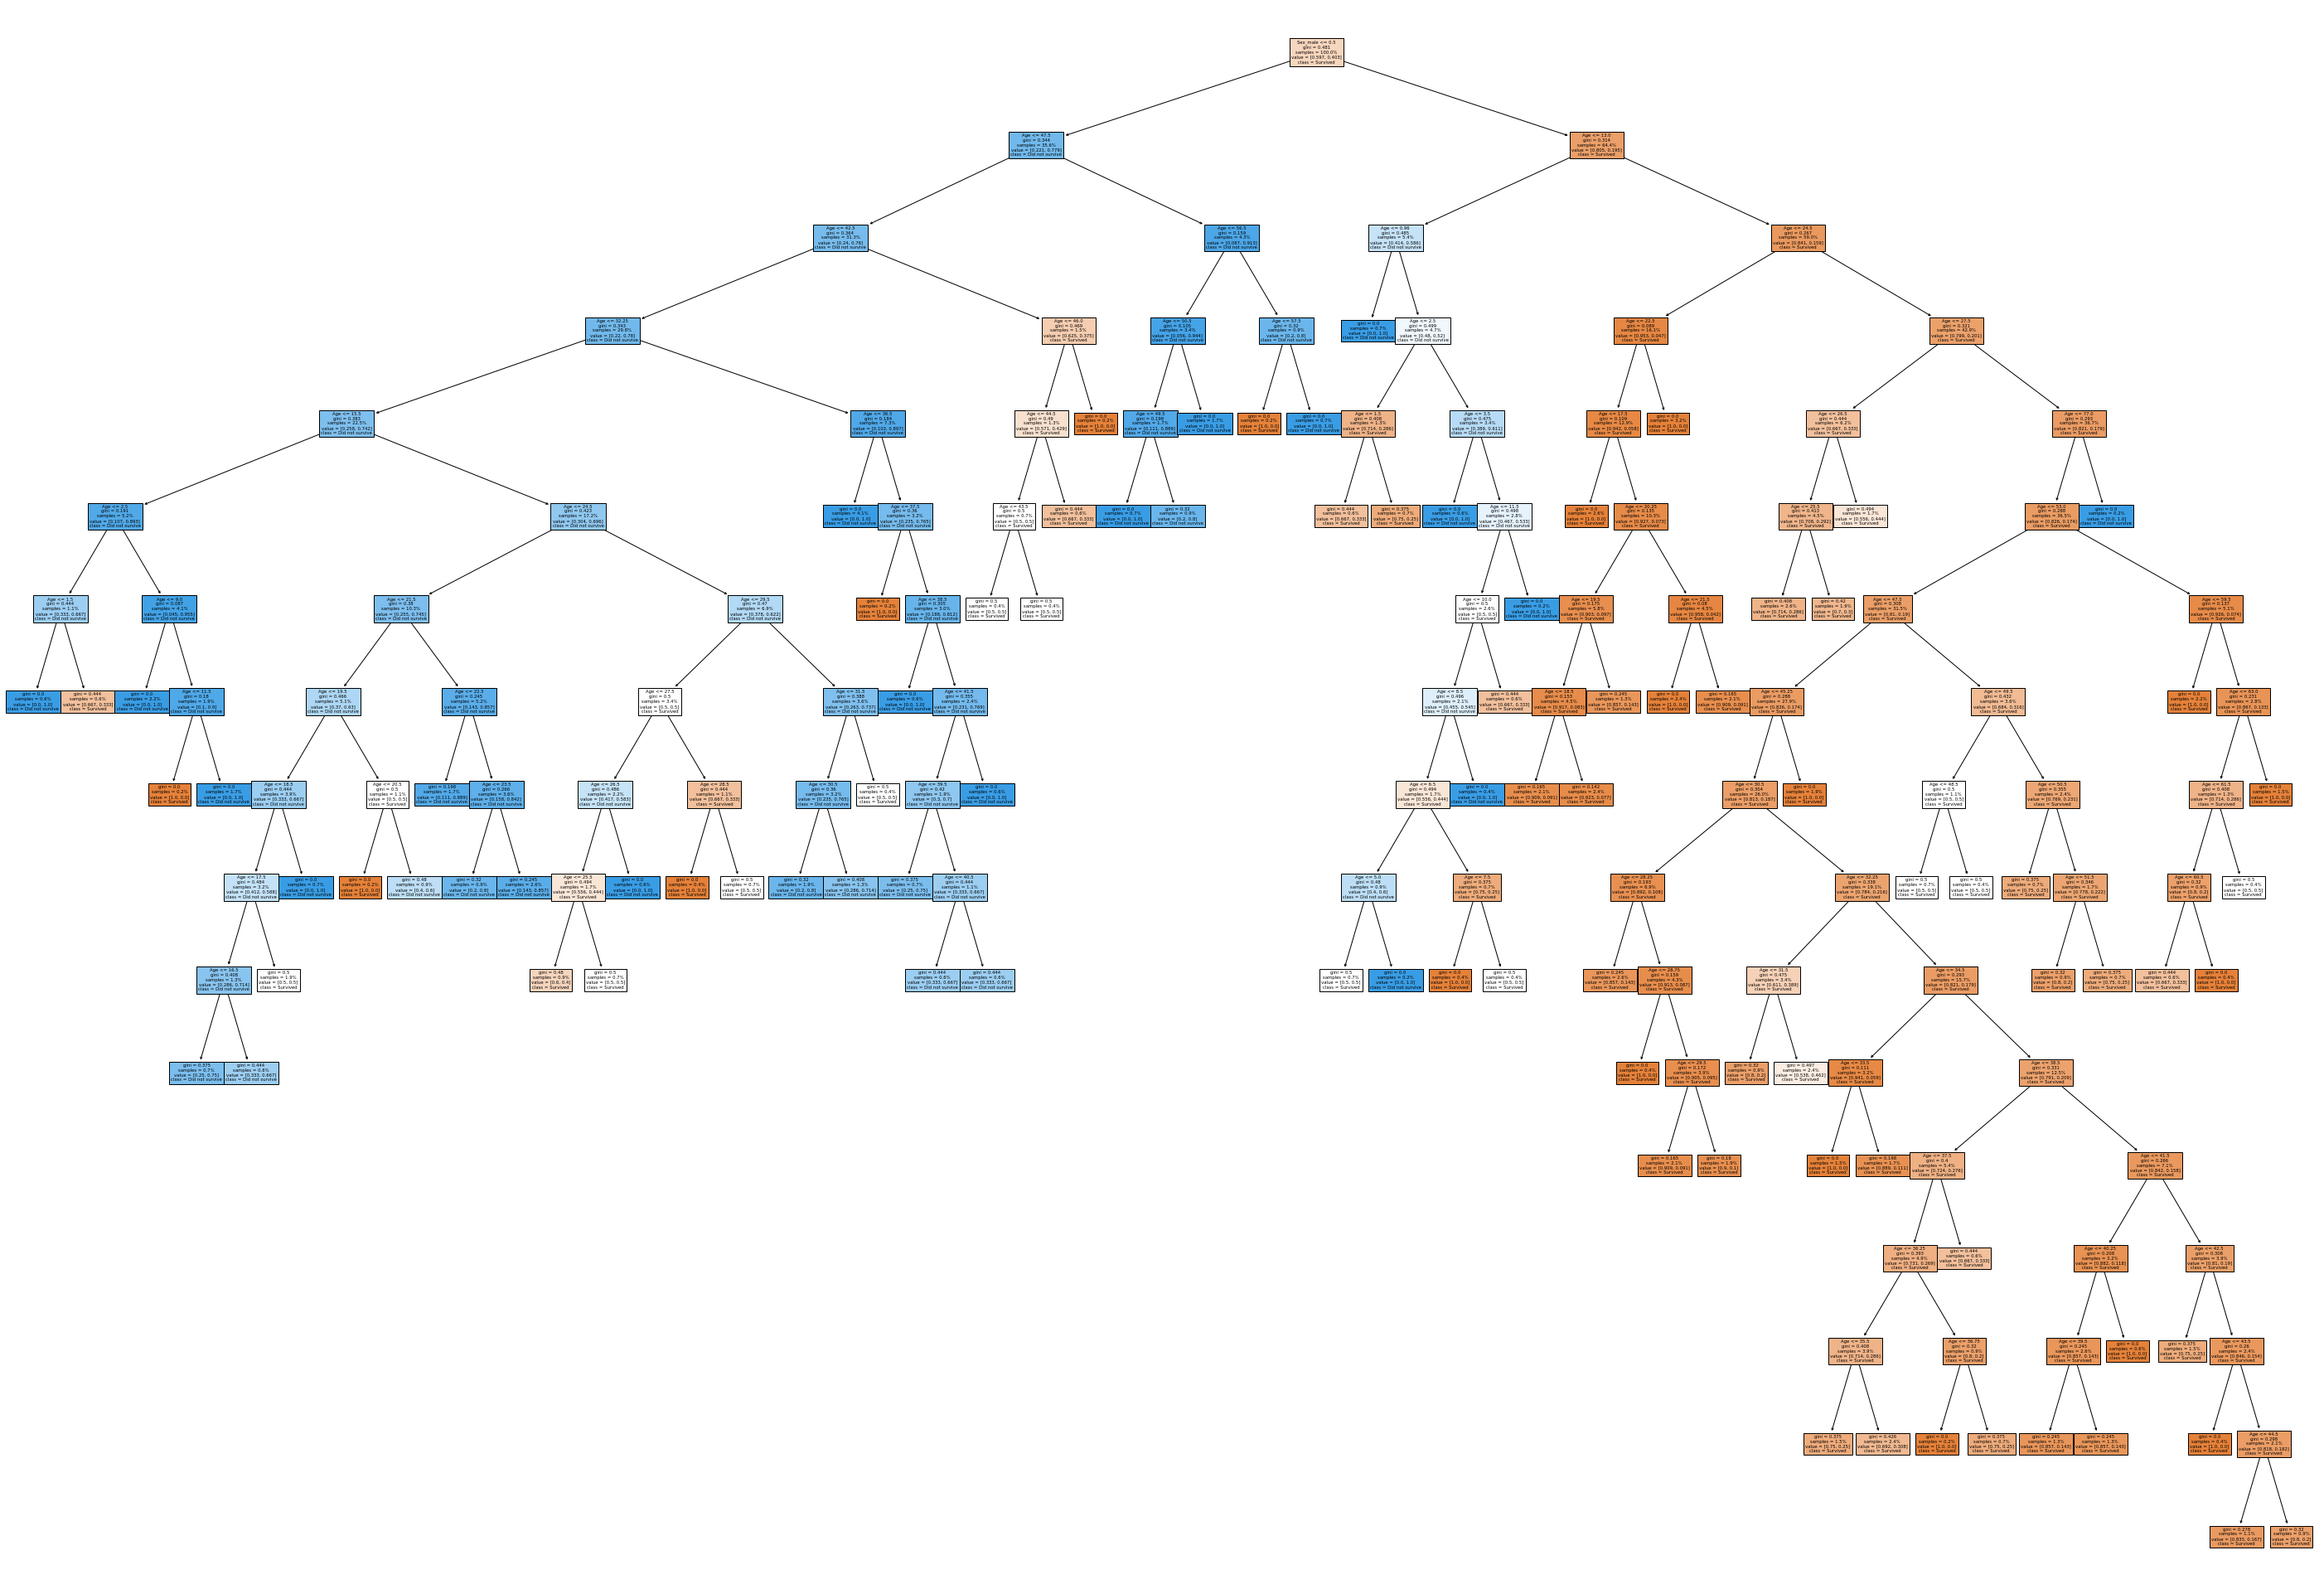

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,35))
plot_tree(treemodel,feature_names=X_train.columns,class_names=["Survived","Did not survive"],proportion=True,filled=True)
plt.show()

What do you think happened? Did you expect the resulting tree to have that size?

In [22]:
# since the tree tend to overfit it made breaks for almost all the data

## Using the `mlxtend.plotting` module, plot the decision boundaries for the Tree classification algorithm.

Use `!pip install mlxtend --user` to install the `mlxtend` package


_hint: you have to convert the dataframes to np.array before plotting in this package_

Note: Include the labels on the plot using: 

`plt.xlabel(x_test.columns[0])`

`plt.ylabel(x_test.columns[1]);`

where x_test is your dataframe.

Text(0, 0.5, 'Age')

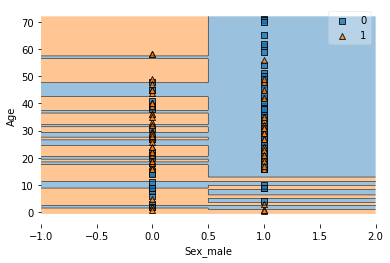

In [23]:
# your code here
import mlxtend.plotting as mlplt
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()
mlplt.plot_decision_regions(X_test_array,y_test_array,treemodel)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

You should have observed a high granularity of lines cutting the drawing. What do you think those represent? What exactly do they represent from a Tree algorithm? 

In [24]:
# your answer here
#There is a lot of overfitting as there are many lines that only have a couple of samples 

## Perform the same operation (i.e., use the `mlxtend.plotting` module to plot the decision boundary) for the Logistic Regression model you've created above.

Text(0, 0.5, 'Age')

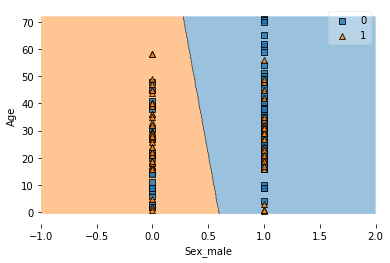

In [25]:
# your code here
import mlxtend.plotting as mlplt
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()
mlplt.plot_decision_regions(X_test_array,y_test_array,lrmodel)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

What differences do you observe from them? The variable Age is important for the logistic regression? For different values of Age, how is the decision boundary affected? Why do you think that happens? Try to remember the `titanic-exploration` lab to recall how was Age correlated with the variable `Survived` and how we've managed to see some importance there.

In [26]:
# your code here
# The logistic regression did not perceived the differences on the 

# Fixing the Decision Tree algorithm

As you observed, an overfit occurred when using the default values of the DecisionTreeClassifier. This happens because, by default, the Decision Tree is so complex that it manages to memorize the whole dataset despite the granularity necessary to do that. It just keeps creating splits until each observation is memorized. 

In this sense, by default, the Decision Tree algorithm is **too complex**. We will solve this problem by making the tree a bit less complex. We'll change the parameter called `max_depth` for the DecisionTreeClassifier().

Try to find a good value for `max_depth` that helps getting closer results within `train` and `test` scores.

In [27]:
# your code here
treemodel_fix= DecisionTreeClassifier(max_depth=4)
treemodel_fix.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
a= treemodel_fix.score(X_train,y_train)
r=recall_score(treemodel_fix.predict(X_train),y_train)
p=precision_score(treemodel_fix.predict(X_train),y_train)
print(f"For the train dataset the accuracy is {a}, the precision score is {p} and the recall score is {r}")

For the train dataset the accuracy is 0.8164794007490637, the precision score is 0.7441860465116279 and the recall score is 0.7881773399014779


In [29]:
a= treemodel_fix.score(X_test,y_test)
r=recall_score(treemodel_fix.predict(X_test),y_test)
p=precision_score(treemodel_fix.predict(X_test),y_test)
print(f"For the test dataset the accuracy is {a}, the precision score is {p} and the recall score is {r}")

For the test dataset the accuracy is 0.702247191011236, the precision score is 0.6164383561643836 and the recall score is 0.6428571428571429


## Plot the resulting tree and deicision boundary. 

After choosing a good value for `max_depth`, i.e., a value that manages to get a good balance within performance and generalization

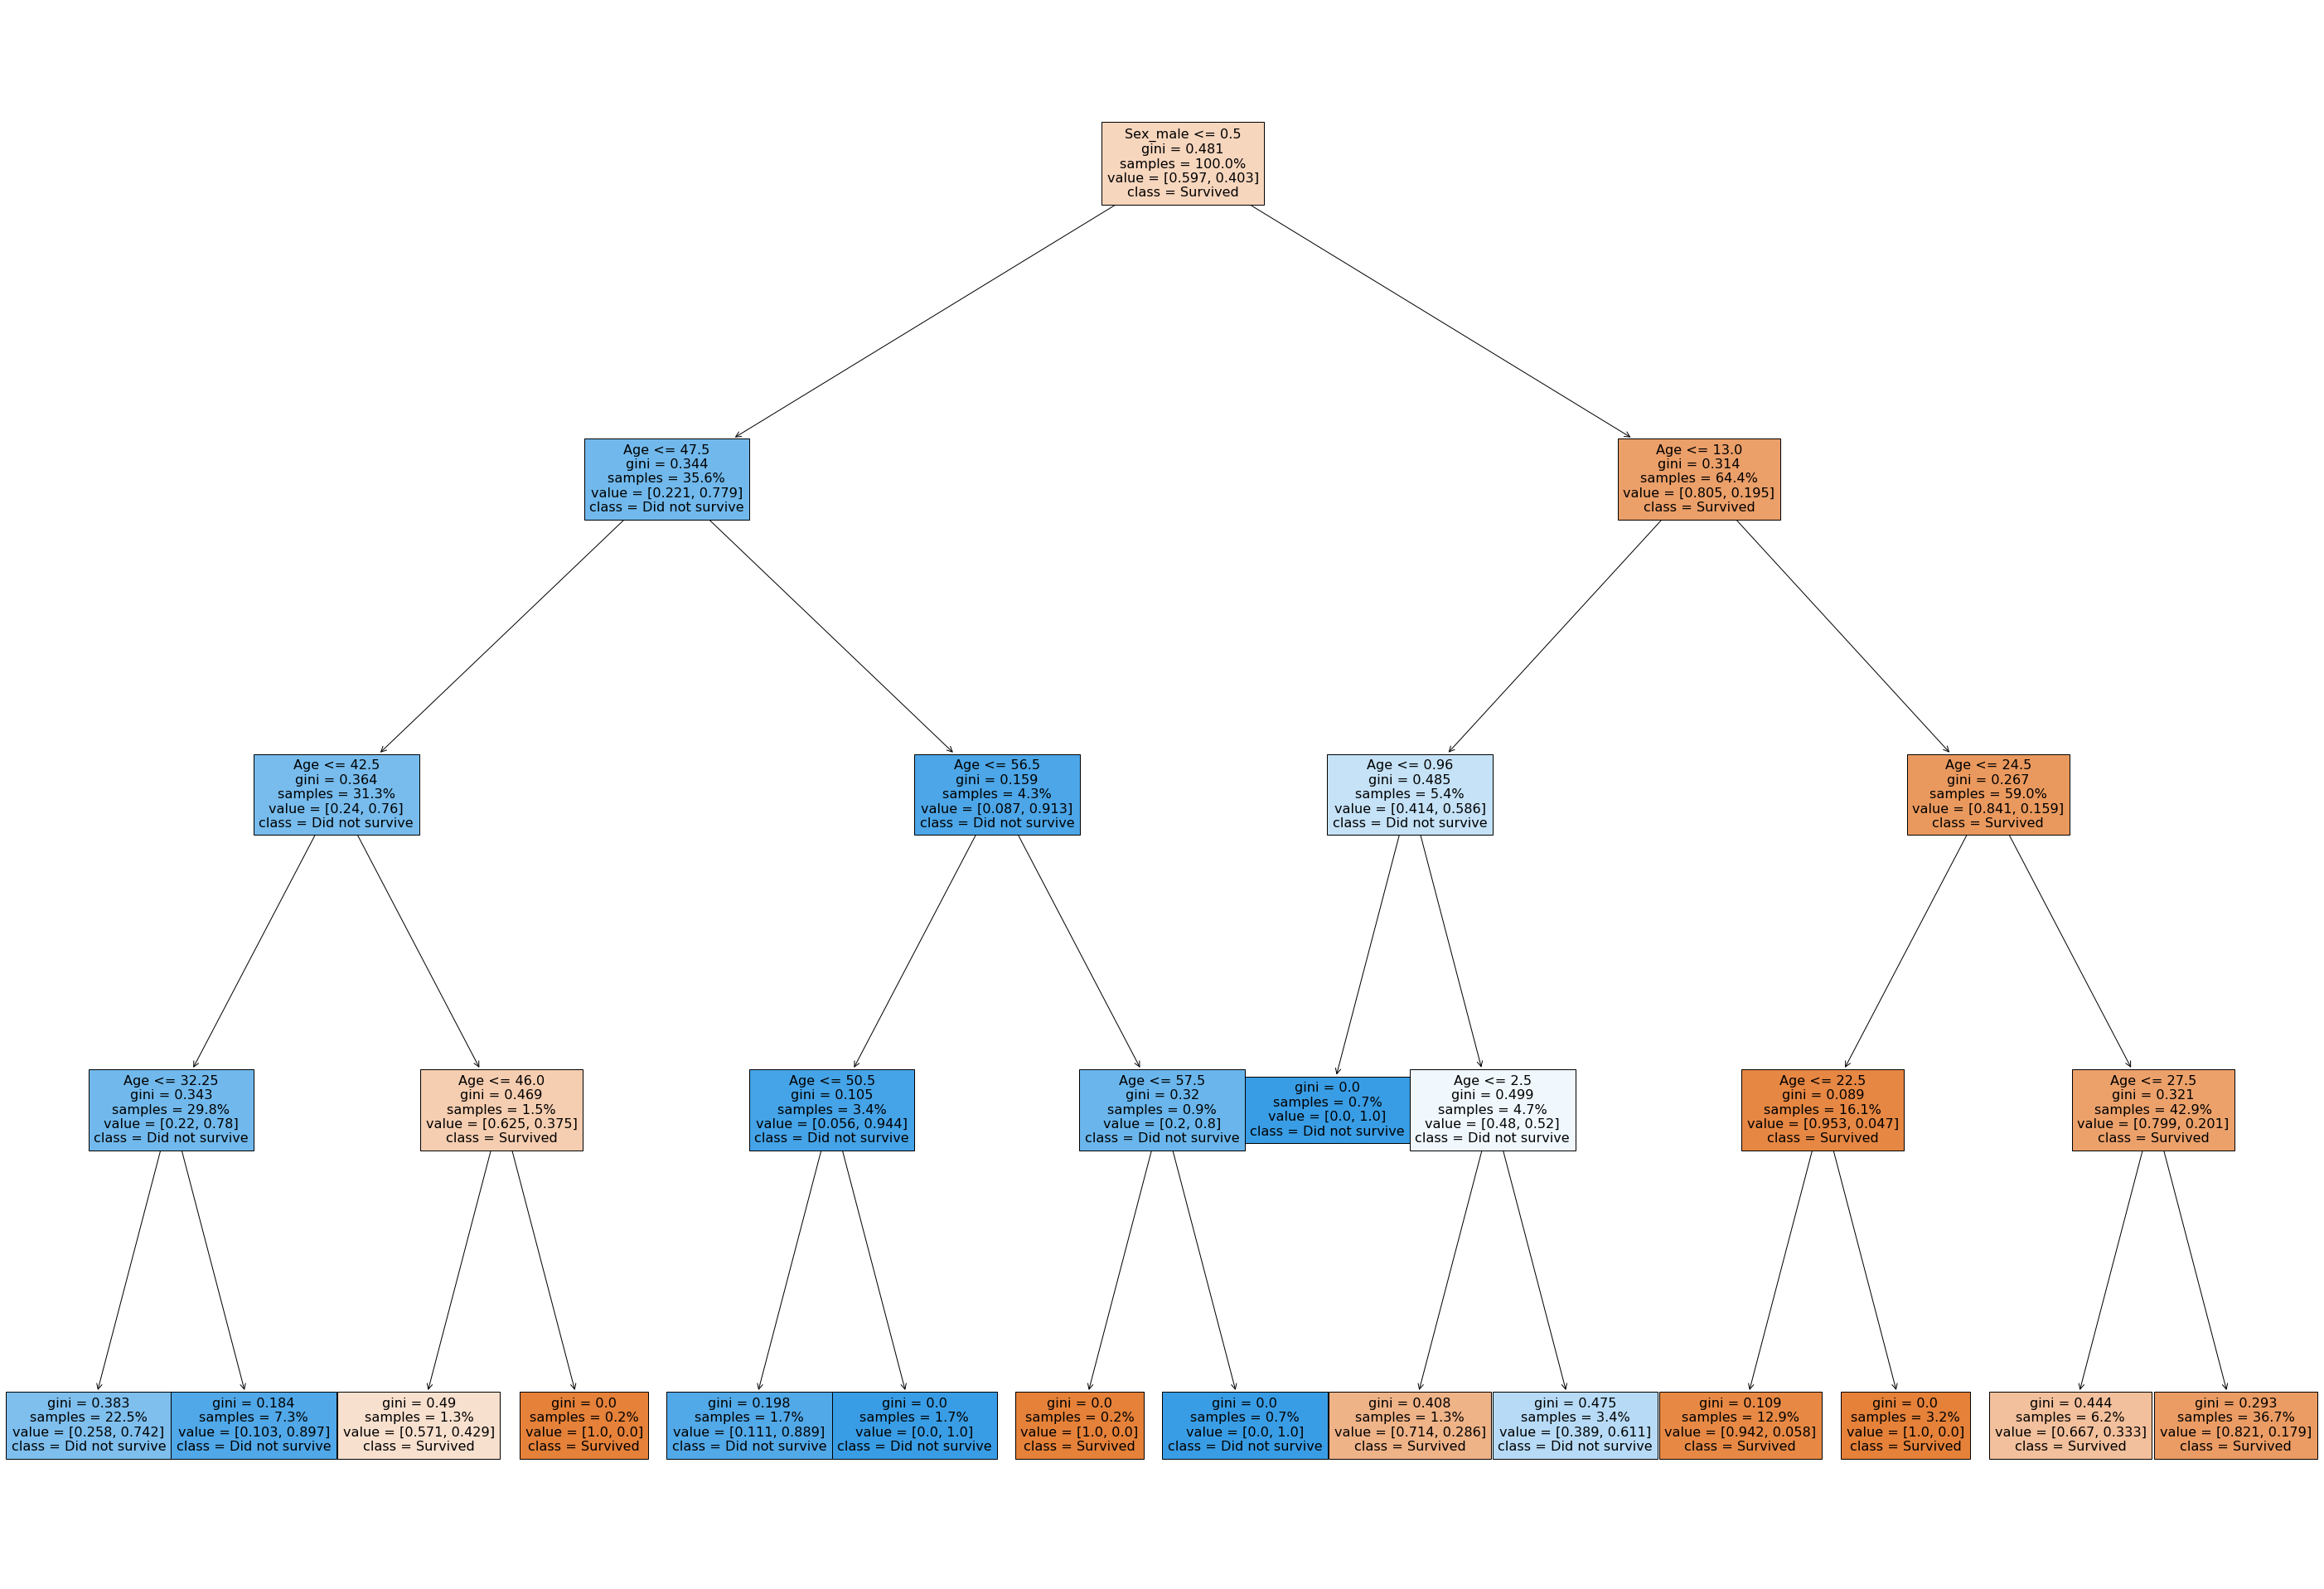

In [30]:
# your code here
plt.figure(figsize=(50,35))
plot_tree(treemodel_fix,feature_names=X_train.columns,class_names=["Survived","Did not survive"],proportion=True,filled=True)
plt.show()

Text(0, 0.5, 'Age')

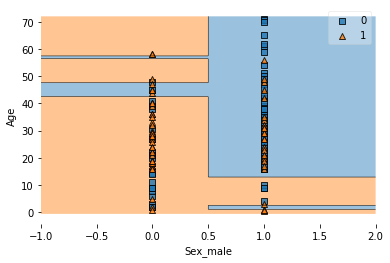

In [31]:
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()
mlplt.plot_decision_regions(X_test_array,y_test_array,treemodel_fix)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

### Question:

- Can you identify which one was the most important feature on this decision tree model?

In [32]:
# your answer here
list(zip(X_train.columns,treemodel_fix.feature_importances_))

[('Sex_male', 0.7779267801821258), ('Age', 0.22207321981787417)]

# Finally, use more variables

Try to obtain a good score for your problem. Use more variables if you wish. You can plot the tree to understand the variables.

In [33]:
# your code here
X_train=titanic_train.drop("Survived",axis=1)
X_test=titanic_test.drop("Survived",axis=1)

In [34]:
treemodel_all= DecisionTreeClassifier(max_depth=4)
treemodel_all.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
a= treemodel_all.score(X_train,y_train)
r=recall_score(treemodel_all.predict(X_train),y_train)
p=precision_score(treemodel_all.predict(X_train),y_train)
print(f"For the train dataset the accuracy is {a}, the precision score is {p} and the recall score is {r}")

For the train dataset the accuracy is 0.8576779026217228, the precision score is 0.6790697674418604 and the recall score is 0.954248366013072


In [36]:
a= treemodel_all.score(X_test,y_test)
r=recall_score(treemodel_all.predict(X_test),y_test)
p=precision_score(treemodel_all.predict(X_test),y_test)
print(f"For the test dataset the accuracy is {a}, the precision score is {p} and the recall score is {r}")

For the test dataset the accuracy is 0.7696629213483146, the precision score is 0.547945205479452 and the recall score is 0.8333333333333334


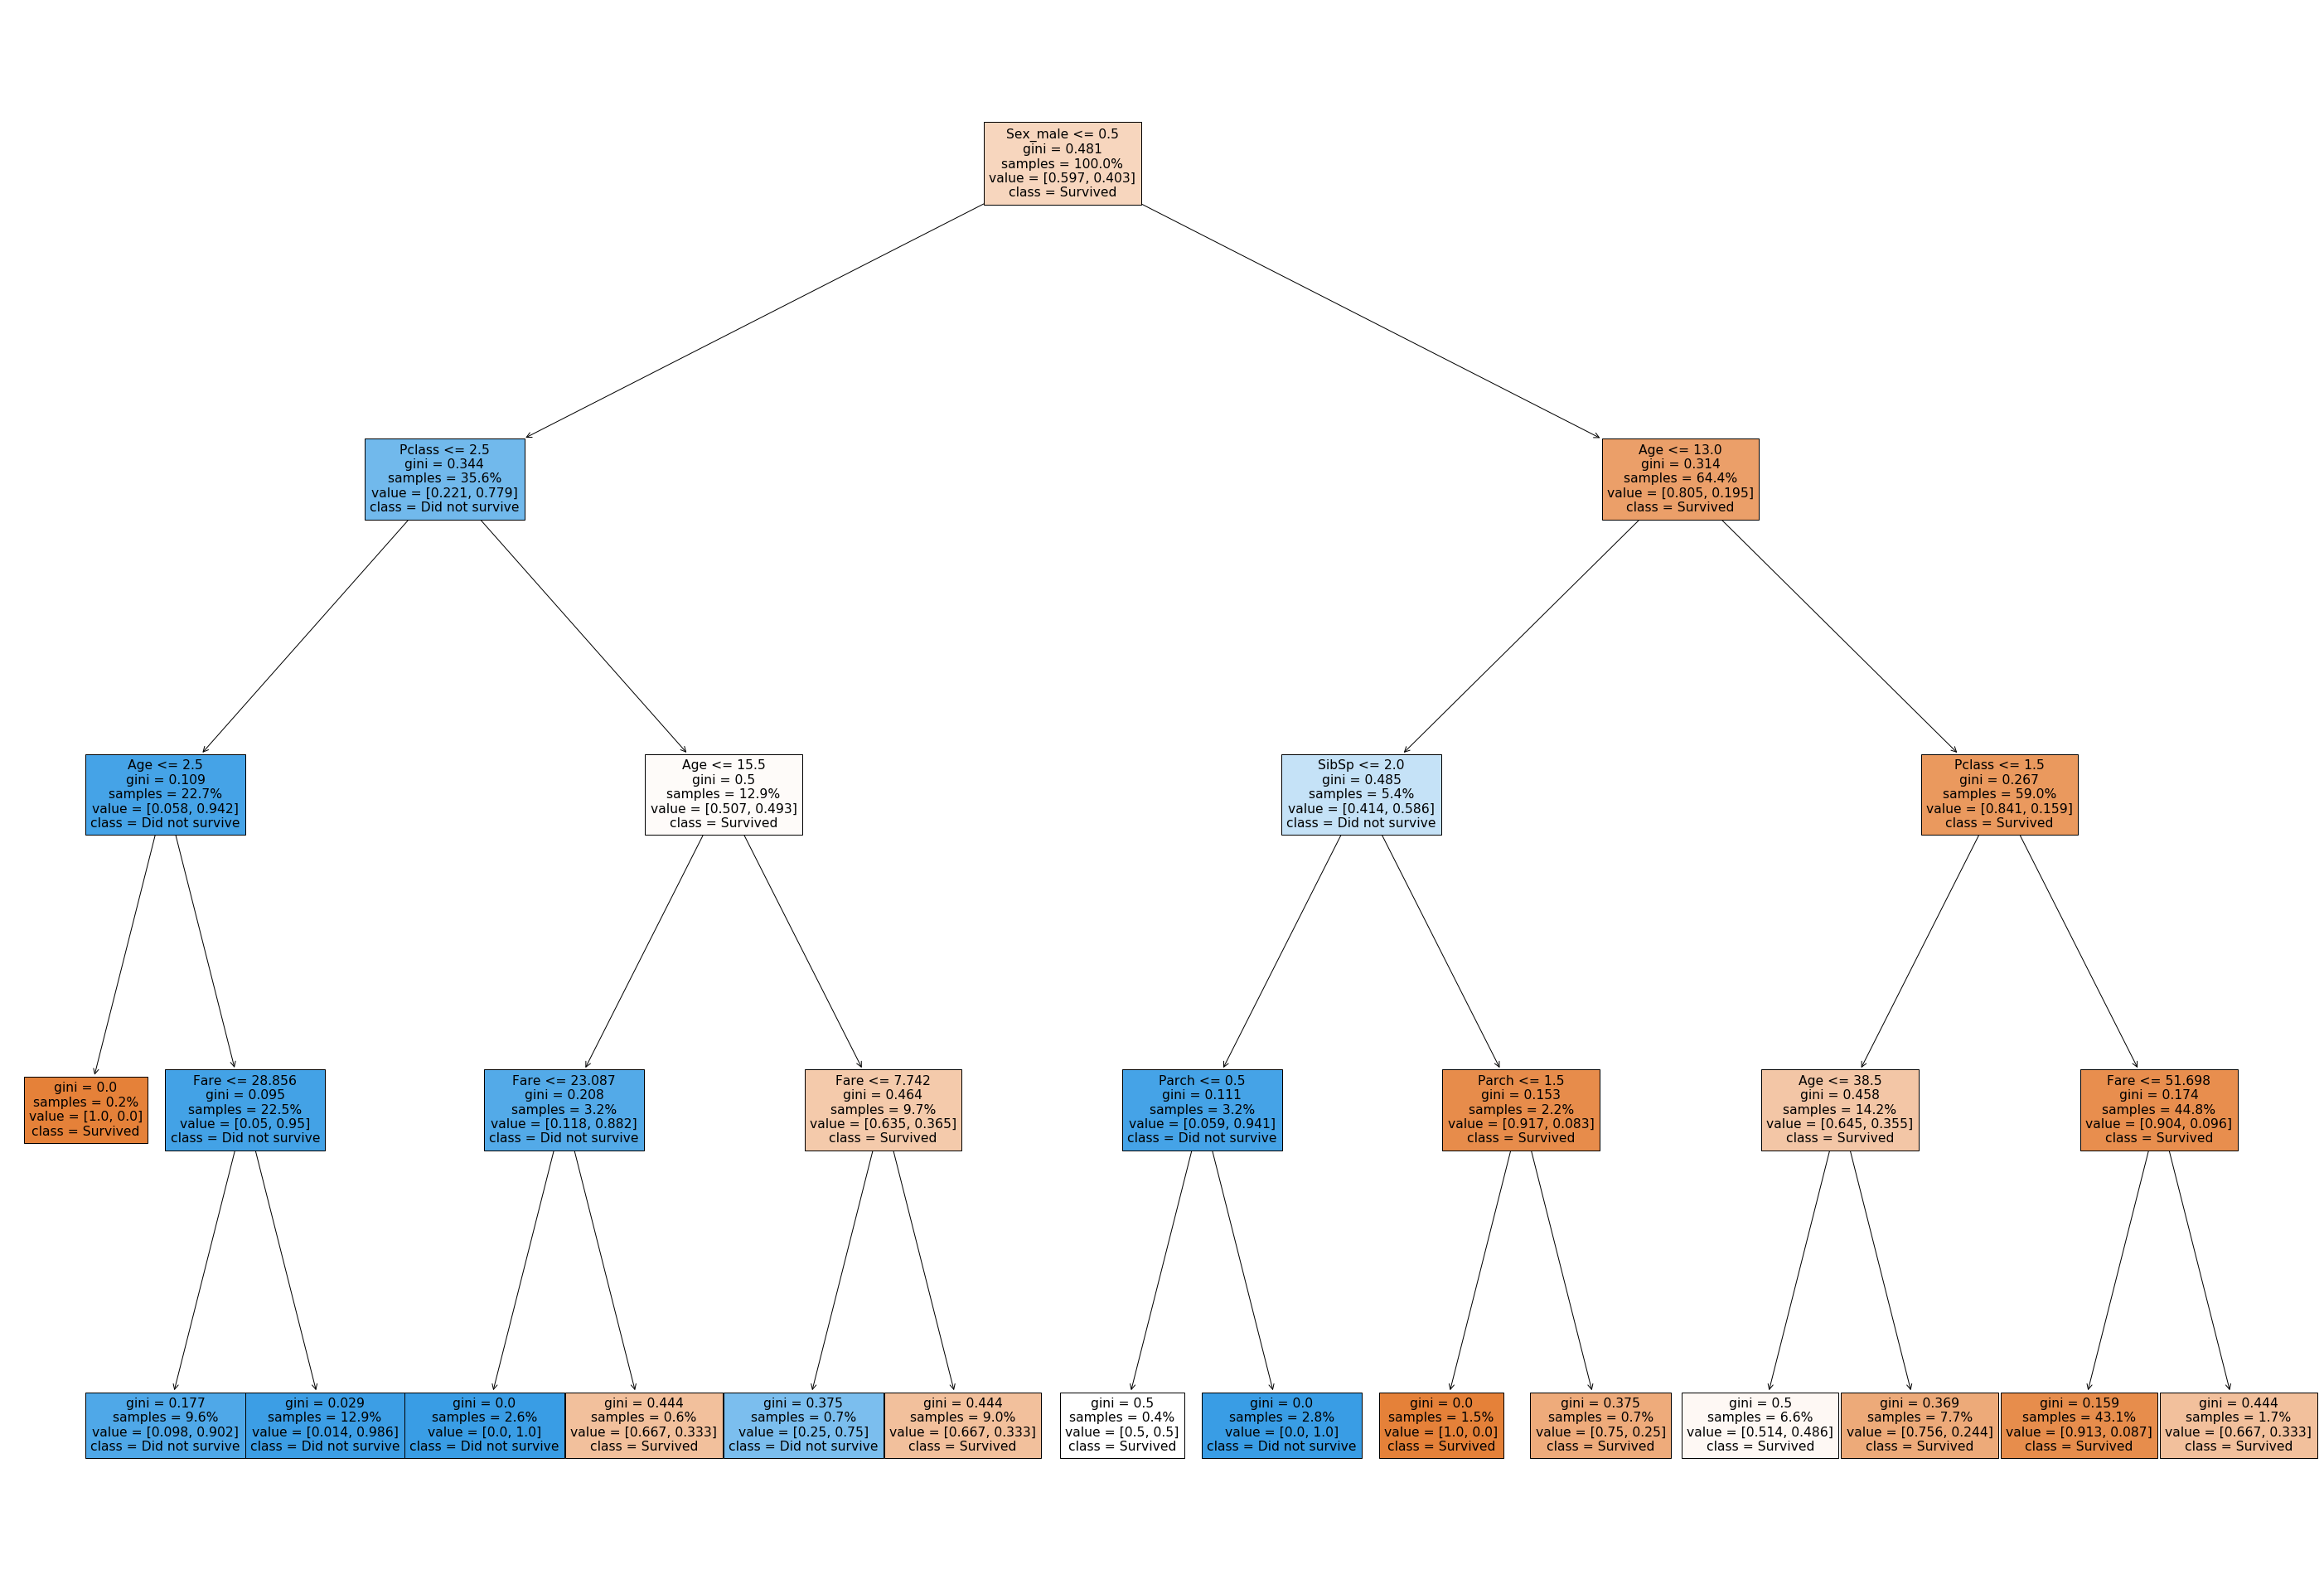

In [37]:
plt.figure(figsize=(50,35))
plot_tree(treemodel_all,feature_names=X_train.columns,class_names=["Survived","Did not survive"],proportion=True,filled=True)
plt.show()

In [38]:
#Now we can see that other features besides age show up like, fare, class and amount of siblings and spouses  